In [64]:
"""
Visualizes how sentenctes are split into tokens and converted into numbers.
"""
%pip install -q matplotlib networkx transformers

'\nVisualizes how sentenctes are split into tokens and converted into numbers.\n'

In [65]:
from transformers import AutoTokenizer

# Load a pre-trained tokenizer from the Hugging Face library specific to BERT (cased model).
my_tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

# Define a sentence to be tokenized.
raw_text = "Jeanna's backpack is teal!"

# Tokenize the text into a list of tokens (words and subwords) understandable by the BERT model.
tokens = my_tokenizer.tokenize(raw_text)
print('List of tokens:', tokens)  # Outputs the tokens generated from the text.

# Get a detailed tokenization output that includes special tokens (like [CLS], [SEP]) used by the BERT model.
detailed_tokens = my_tokenizer(raw_text).tokens()
print('tokens with special characters:', detailed_tokens)  # Shows tokens including special characters used by BERT.

# If we already have the list of tokens, we can convert them directly into their corresponding IDs.
detailed_ids = my_tokenizer.convert_tokens_to_ids(detailed_tokens)
print('tokens --> IDs:', detailed_ids)  # Converts and shows token IDs from the previously obtained tokens.

# Encode the text into a list of token IDs. These IDs are what the BERT model actually processes.
token_ids = my_tokenizer.encode(raw_text)
print('Token IDs from raw text:', token_ids)  # Displays the list of numerical token IDs corresponding to each token.

# Encode the text and explore the complete tokenization output object. This includes various keys like 'input_ids'.
token_dict = my_tokenizer(raw_text)
print('my_tokenizer() output:', token_dict)  # Shows complete tokenization result including additional attributes.

# Specifically extract and print only the 'input_ids' from the tokenization output.
print('Input IDs:', token_dict.input_ids)  # Shows only the 'input_ids' from the complete tokenization output.


List of tokens: ['Jean', '##na', "'", 's', 'backpack', 'is', 'tea', '##l', '!']
tokens with special characters: ['[CLS]', 'Jean', '##na', "'", 's', 'backpack', 'is', 'tea', '##l', '!', '[SEP]']
tokens --> IDs: [101, 2893, 1605, 112, 188, 13846, 1110, 5679, 1233, 106, 102]
Token IDs from raw text: [101, 2893, 1605, 112, 188, 13846, 1110, 5679, 1233, 106, 102]
my_tokenizer() output: {'input_ids': [101, 2893, 1605, 112, 188, 13846, 1110, 5679, 1233, 106, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
Input IDs: [101, 2893, 1605, 112, 188, 13846, 1110, 5679, 1233, 106, 102]


In [18]:
# Tokenize the text and convert it into a list of integer IDs. Each ID corresponds to a unique token.
ids = my_tokenizer.encode(raw_text)
print('Integer IDs for tokens:', ids)  # Outputs the list of token IDs that represent each token from the text.

# Convert the list of token IDs back into their corresponding token strings.
tokens_from_ids = my_tokenizer.convert_ids_to_tokens(ids)
print('List of tokens from IDs:', tokens_from_ids)  # Displays the tokens that correspond to the integer IDs.

# Decode the list of token IDs back into the original text. This demonstrates the inverse operation of encoding.
decoded_text = my_tokenizer.decode(ids)
print('Decoded text from IDs:', decoded_text)  # Shows the text reconstructed from the token IDs.

# Decode the token IDs back into text while ignoring special tokens like [CLS] and [SEP].
decoded_text_no_specials = my_tokenizer.decode(ids, skip_special_tokens=True)
print('Decoded text without special tokens:', decoded_text_no_specials)  # Outputs text excluding special tokens used by BERT.




Integer IDs for tokens: [101, 2893, 1605, 112, 188, 13846, 1110, 5679, 1233, 106, 102]
List of tokens from IDs: ['[CLS]', 'Jean', '##na', "'", 's', 'backpack', 'is', 'tea', '##l', '!', '[SEP]']
Decoded text from IDs: [CLS] Jeanna's backpack is teal! [SEP]
Decoded text without special tokens: Jeanna's backpack is teal!


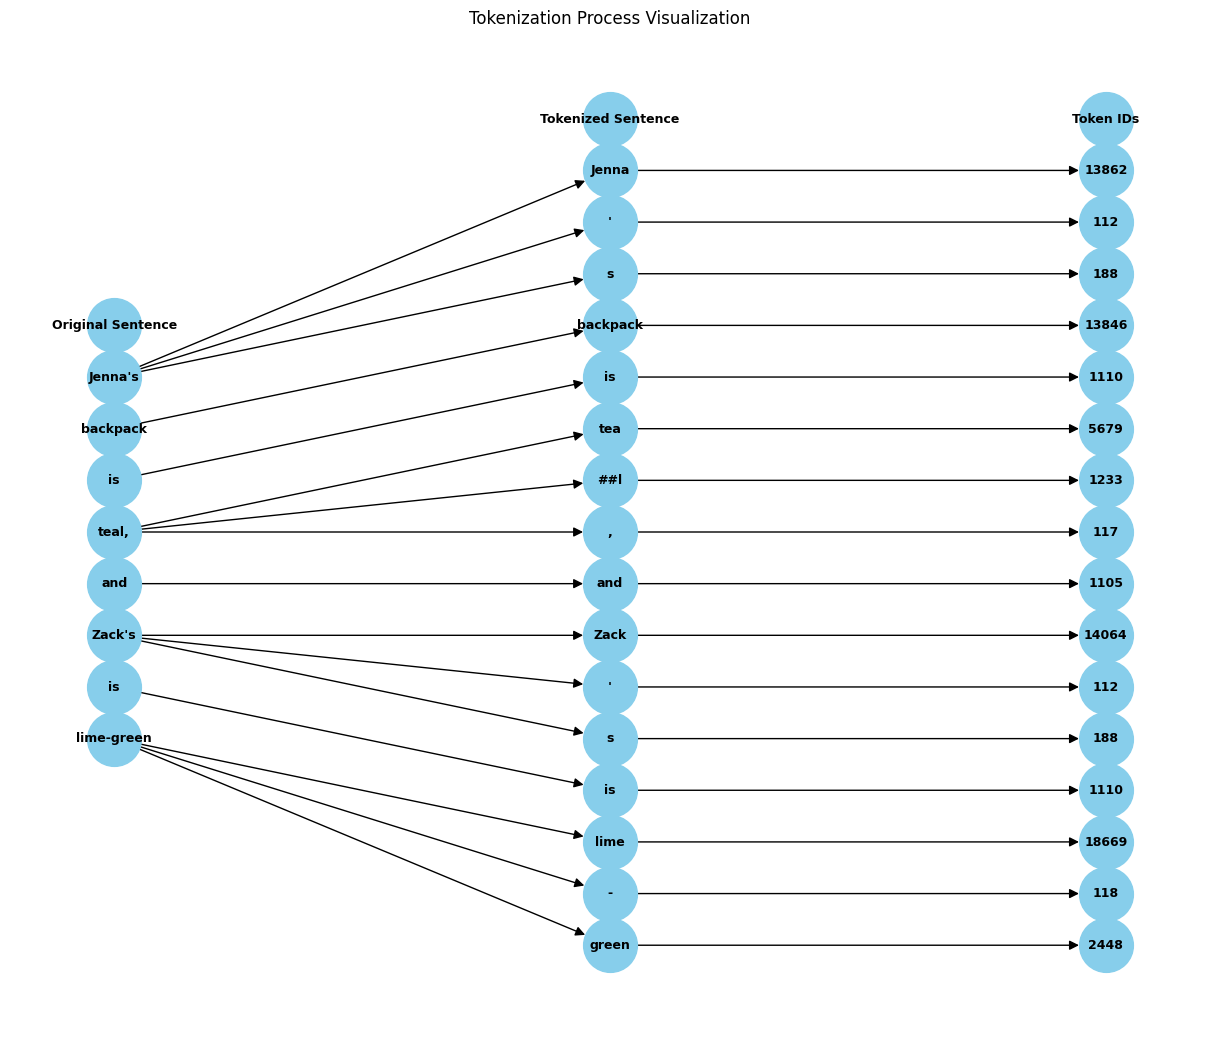

In [66]:
import networkx as nx
import matplotlib.pyplot as plt
from transformers import AutoTokenizer

# Initialize the tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

# Define the sentence to be tokenized
raw_text = "Jenna's backpack is teal, and Zack's is lime-green"
# raw_text = "Jeanna's backpack is teal!"

# Tokenize the text and get token IDs
tokens = tokenizer(raw_text).tokens()
token_ids = tokenizer.convert_tokens_to_ids(tokens)

tokens_from_ids = my_tokenizer.convert_ids_to_tokens(ids)

# Create a graph
G = nx.DiGraph()

# Add nodes for each step in the tokenization process, assigning each to a specific subset (layer)
G.add_node("Original Sentence", label="Original Sentence", subset=0)
G.add_node("Tokenized Sentence", label="Tokenized Sentence", subset=1)
G.add_node("Token IDs", label="Token IDs", subset=2)

# Tokenize each word and add nodes and edges for each token and word
for i, word in enumerate(raw_text.split(" ")):
    word_node = f"Word_{i}"
    G.add_node(
        word_node, label=word, subset=0
    )  # Each word gets its own node in subset 1
    G.add_edge(
        "Original Sentence", word_node
    )  # Connect each word to the original sentence

    # Tokenize each word separately
    tokens = tokenizer.tokenize(word)
    token_ids = tokenizer.convert_tokens_to_ids(tokens)

    # Add nodes for each token and edge from the word to each token
    for j, token in enumerate(tokens):
        token_node = f"Token_{i}_{j}"
        G.add_node(token_node, label=token, subset=1)  # Each token in subset 2
        G.add_edge("Tokenized Sentence", token_node)
        G.add_edge(word_node, token_node)  # Connect the word to its tokens

        # Add nodes for token IDs and connect tokens to their IDs
        tokenid_node = f"ID_{i}_{j}"
        G.add_node(
            tokenid_node, label=str(token_ids[j]), subset=2
        )  # Each token ID in subset 3
        G.add_edge("Token IDs", tokenid_node)
        G.add_edge(token_node, tokenid_node)  # Connect the token to its ID


# Position nodes using hierarchical layout
pos = nx.multipartite_layout(
    G, subset_key="subset"
)  # Using the 'subset' key to position nodes

# Draw the graph
plt.figure(figsize=(12, 10))
nx.draw(
    G,
    pos,
    with_labels=True,
    labels=nx.get_node_attributes(G, "label"),
    node_size=1500,
    node_color="skyblue",
    font_size=9,
    font_weight="bold",
    arrowstyle="-|>",
    arrowsize=14,
)
plt.title("Tokenization Process Visualization")
plt.show()